# **Importing Necessary Libraries**

In [111]:
import warnings
warnings.simplefilter("ignore")

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading the dataset

In [113]:
df = pd.read_csv('/Users/stark/Downloads/Upgrad Loan EDA/loan.csv')

# **Exploring and Data Cleaning**

In [114]:
# Print top 5 rows of the dataframe
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [115]:
#Print shape of the dataframe
df.shape

(39717, 111)

We have a dataframe of 39717 rows and 111 columns. In the next step, we'll check for null values and drop them or treat them.

In [116]:
# Check null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [117]:
# Percentage of null values
round(100*(df.isnull().sum() / len(df.index)),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

There are columns which has 100% of null values which will not be useful for analysis. Let's drop the columns that has null values more than 85%

In [118]:
# Printing the columns which has null values more tha 85%
null_more_than85 = df.columns[100*(df.isnull().sum() / len(df.index)) > 85]
print(null_more_than85)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [119]:
# Dropping those columns
df = df.drop(null_more_than85,axis=1)
df.shape

(39717, 55)

In [120]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [121]:
# Dropping further unwanted cols
df = df.drop(['url','desc','title','zip_code','addr_state'],axis=1)
df.shape

(39717, 50)

Our aim is to find whether a person is going to default his loan or not. lets remove those columns which are not necessary for further analysis

In [122]:
# Create a variable and drop unnnecessary columns
remove_col = [
    'delinq_2yrs',
    'earliest_cr_line',
    'inq_last_6mths',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'revol_util',
    'total_acc',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'recoveries',
    'collection_recovery_fee',
    'last_pymnt_d',
    'last_pymnt_amnt',
    'application_type',
    'last_credit_pull_d'
]
print(remove_col)

['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'application_type', 'last_credit_pull_d']


In [123]:
#Dropping thos columns
df0 = df.drop(remove_col,axis = 1)

In [124]:
df0.shape

(39717, 29)

In [125]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Lets extract the month from term and convert it to a numeric format

In [126]:
# Extract month from term and retain the numeric value
df0['term'] = df0['term'].apply(lambda x: x.split("months")[0])

In [127]:
# Converting term to int64
df0['term'] = df0['term'].astype(np.int64)

In [128]:
df0.term.dtype

dtype('int64')

Let's extract % from int_rate and convert it to float64

In [129]:
#Removing the % symbol from int_rate colum
df0['int_rate'] = df0['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))


In [130]:
# Check for type of int_rate
df0.int_rate.dtype

dtype('float64')

In [131]:
# Negating nulls in emp_lenght column
df0 = df0[~df0['emp_length'].isnull()]

In [132]:
# Check for nulls in emp_length
df0.emp_length.isnull().sum()

0

In [133]:
df0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,27.65,NaN,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1.00,NaN,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,8.72,NaN,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,20.00,35.0,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,17.94,38.0,f,0.0,1,0,0.0,0,0.0,0.0


In [134]:
# Extract numeric values from string
import re as r
df0['emp_length'] = df0['emp_length'].apply(lambda x: r.findall('\d+',str(x))[0])

# Converting to numeric
df0['emp_length'] = df0['emp_length'].apply(lambda x:pd.to_numeric(x))


In [135]:
#Check datatype of emp_length
df0.emp_length.dtype

dtype('int64')

In [136]:
df0.shape

(38642, 29)

Let's move to analysing the loan_status column which is the most important one from which we are going to find if a person is going to pay or default his loan.


In [137]:
# Converting the type of loan_status 
f0['loan_status'] = df0['loan_status'].astype('category')
df0['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

The EDA focuses on whether the customer will be paying his loan or not. So in this case we are retaining fully paid and charged of category and dropping current. 0 represents if the loan is fully paid and 1 represents charged off.

In [138]:
# Filtering the column
df0 = df0[df0['loan_status'] != "Current"]
df0['loan_status'] = df0['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

#Converting to numeric
df0['loan_status'] = df0['loan_status'].apply(lambda x: pd.to_numeric(x))

# Summarising loan_status colums
df0['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [139]:
# % of nulls in the dataframe
round(100*(df0.isnull().sum() / len(df0.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      3.75
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
purpose                        0.00
dti                            0.00
mths_since_last_delinq        64.47
initial_list_status            0.00
collections_12_mths_ex_med     0.15
policy_code                    0.00
acc_now_delinq                 0.00
chargeoff_within_12_mths       0.15
delinq_amnt                    0.00
pub_rec_bankruptcies        

In [140]:
# Dropping the columns mths_since_last_delinq and pub_rec_bankrupcies
df0 = df0.drop(['mths_since_last_delinq','pub_rec_bankruptcies'],axis=1)

In [141]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37544 non-null  int64  
 1   member_id                   37544 non-null  int64  
 2   loan_amnt                   37544 non-null  int64  
 3   funded_amnt                 37544 non-null  int64  
 4   funded_amnt_inv             37544 non-null  float64
 5   term                        37544 non-null  int64  
 6   int_rate                    37544 non-null  float64
 7   installment                 37544 non-null  float64
 8   grade                       37544 non-null  object 
 9   sub_grade                   37544 non-null  object 
 10  emp_title                   36136 non-null  object 
 11  emp_length                  37544 non-null  int64  
 12  home_ownership              37544 non-null  object 
 13  annual_inc                  375

Now let's fix the issue on issue_d by extracting month and year

In [142]:
# Check for values present on issue_d column
df0.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [143]:
#Converting string to date time format
from datetime import datetime
df0['issue_d'] = df0['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [144]:
#Extracting month and year from issue_d column
df0['month_issue'] = df0['issue_d'].apply(lambda x: x.month)
df0['year_issue'] = df0['issue_d'].apply(lambda x: x.year)

In [145]:
df0.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,month_issue,year_issue
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,27.65,f,0.0,1,0,0.0,0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1.00,f,0.0,1,0,0.0,0,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,8.72,f,0.0,1,0,0.0,0,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,20.00,f,0.0,1,0,0.0,0,0.0,12,2011
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,11.20,f,0.0,1,0,0.0,0,0.0,12,2011


In [146]:
#Check for values present in emp_title
df0.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [147]:
# Fill Nan in emp_title column with UnKown
df0['emp_title'] = df0['emp_title'].fillna("UnKnown")
df0.emp_title.isnull().sum()

0

In [148]:
# Check for nulls in the dataframe
df0.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
dti                            0
initial_list_status            0
collections_12_mths_ex_med    56
policy_code                    0
acc_now_delinq                 0
chargeoff_within_12_mths      56
delinq_amnt                    0
tax_liens                     39
month_issue                    0
year_issue                     0
dtype: int64

In [149]:
# Dropping further columns
df0 = df0.drop(['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'],axis = 1)

In [150]:
df0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status,pymnt_plan,purpose,dti,initial_list_status,policy_code,acc_now_delinq,delinq_amnt,month_issue,year_issue
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0,n,credit_card,27.65,f,1,0,0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1,n,car,1.00,f,1,0,0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0,n,small_business,8.72,f,1,0,0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0,n,other,20.00,f,1,0,0,12,2011
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,0,n,wedding,11.20,f,1,0,0,12,2011


In [151]:
# Check for nulls again
df0.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
purpose                0
dti                    0
initial_list_status    0
policy_code            0
acc_now_delinq         0
delinq_amnt            0
month_issue            0
year_issue             0
dtype: int64

Now, that most of the of data cleaning process has now finished, the next step will be visualising the dataset with the information in hand. The aim of the visualisation is to help the banks to determine whether a person will pay off his loan or default it. With this, we can derive certain useful informations to the bank such as,


*   Whom to provide loan 
*   What interest rate to be given





# **Data Visualisation**

In [152]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   37544 non-null  int64         
 1   member_id            37544 non-null  int64         
 2   loan_amnt            37544 non-null  int64         
 3   funded_amnt          37544 non-null  int64         
 4   funded_amnt_inv      37544 non-null  float64       
 5   term                 37544 non-null  int64         
 6   int_rate             37544 non-null  float64       
 7   installment          37544 non-null  float64       
 8   grade                37544 non-null  object        
 9   sub_grade            37544 non-null  object        
 10  emp_title            37544 non-null  object        
 11  emp_length           37544 non-null  int64         
 12  home_ownership       37544 non-null  object        
 13  annual_inc           37544 non-

# **Univariate Analysis**

Text(0.5, 1.0, 'Annual Income Distribution')

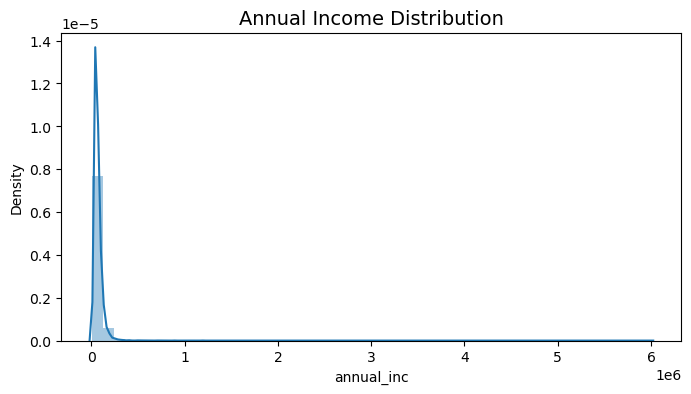

In [153]:
# Let's find the distribution of annual_inc
plt.figure(figsize=[8,4])
sns.distplot(df0['annual_inc'])
plt.title(label = "Annual Income Distribution",
          fontsize=14,
          loc = 'center') 


In [154]:
# Here the annual_inc has a density of not more than 0.8, hence we will limit this under 0.9 
num = np.quantile(df0['annual_inc'], 0.99)
df0 = df0[df0['annual_inc']<num]

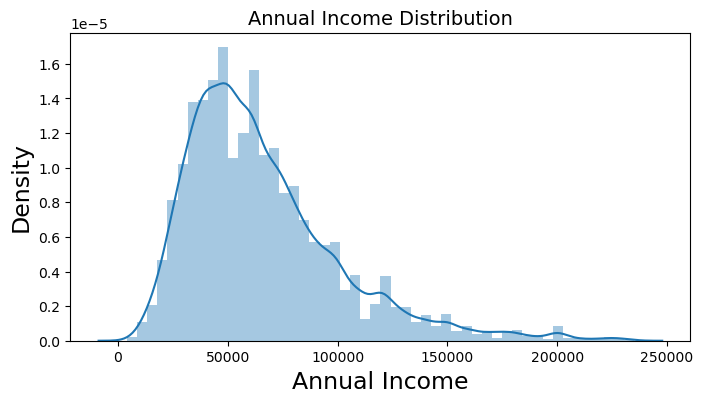

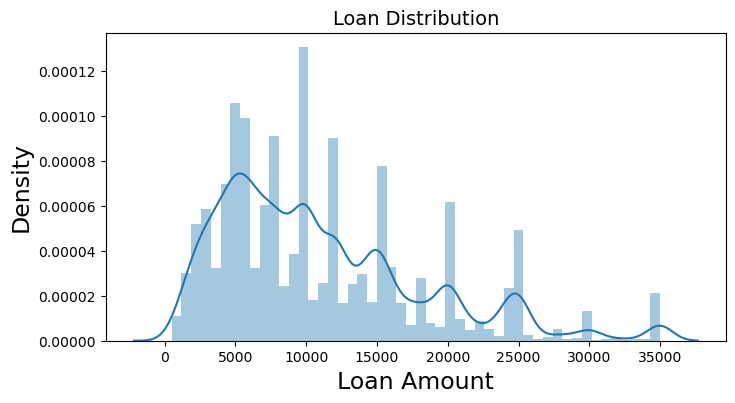

In [155]:
# Visualisation for Annual Income
plt.figure(figsize=(8,4))
sns.distplot(df0['annual_inc'])
plt.title(label = "Annual Income Distribution",fontsize=14) 
plt.xlabel("Annual Income", fontsize=17)
plt.ylabel("Density", fontsize=17)

#Visualisation for loan
plt.figure(figsize=(8,4))
sns.distplot(df0['loan_amnt'])
plt.title(label = "Loan Distribution",fontsize=14) 
plt.xlabel("Loan Amount", fontsize=17)
plt.ylabel("Density", fontsize=17)

plt.show()

In [156]:
# Statistical values of annual income
df0['annual_inc'].describe()

count     37165.000000
mean      65903.070210
std       35153.363496
min        4000.000000
25%       40906.000000
50%       59000.000000
75%       81600.000000
max      234996.000000
Name: annual_inc, dtype: float64

In [157]:
# Creating a new variable called income_range to sort the annual_income according to Low,Medium and High
df0['income_range'] = df0['annual_inc'].apply(lambda x: 'Low' if x < 40906 else 'Medium' if x > 40906 and x < 81600 else 'High')

In [158]:
# Number of time the value occurs in the colums
df0['income_range'].value_counts()

Medium    18570
High       9304
Low        9291
Name: income_range, dtype: int64

Here, the medium annual incomers are the highest number of customers to the bank rather than low and high income customers

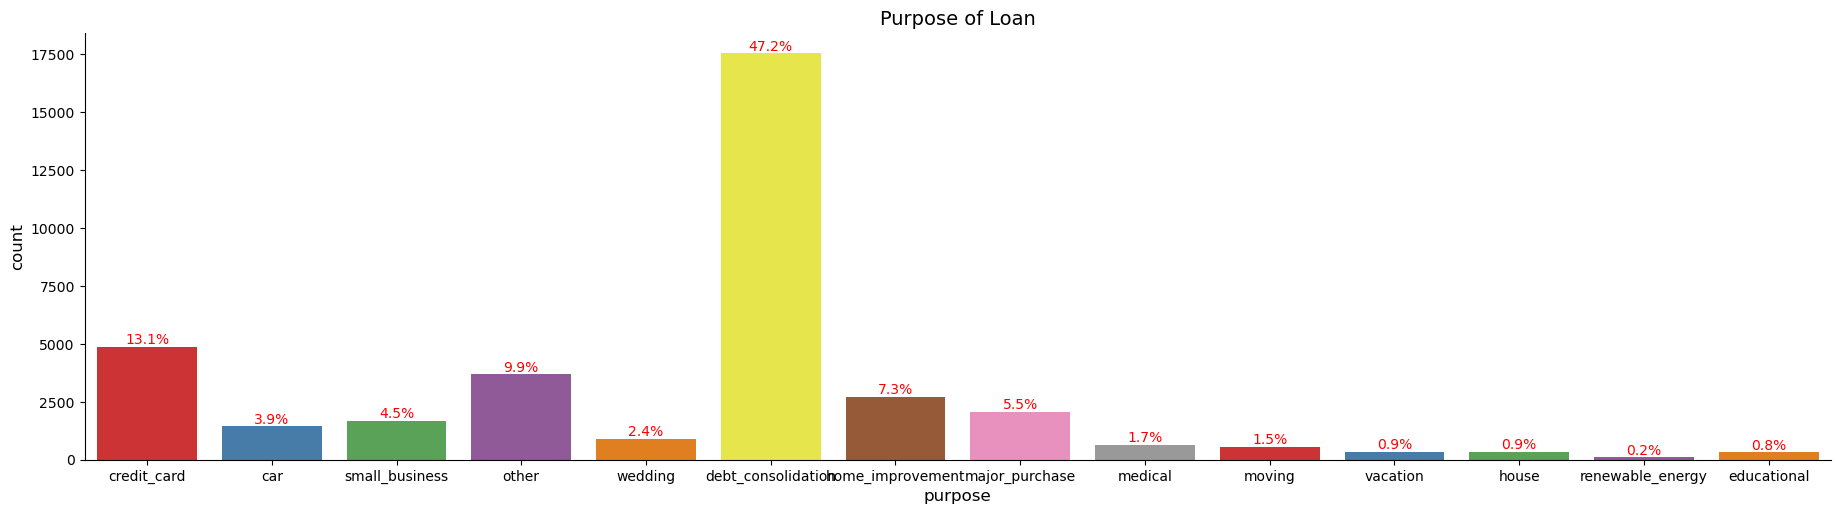

In [159]:
#Plotting purpose of loan
plot = sns.catplot(x="purpose", kind="count", data=df0, palette="Set1", aspect= 3.7);
plt.title('Purpose of Loan', fontsize = 14)
plt.xlabel("purpose", fontsize = 12)
plt.ylabel("count", fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')



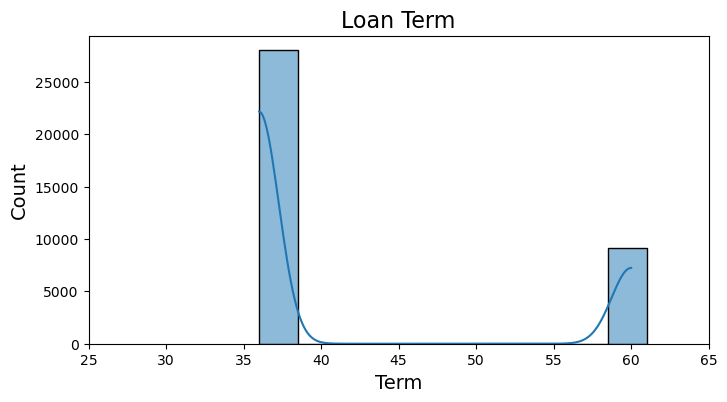

In [160]:
# Plotting a histogram for loan term
plt.figure(figsize = (8,4))
sns.histplot(data = df0['term'],binwidth = 2.5,kde = True)
plt.title(label = "Loan Term",fontsize = 16, loc = 'center')
plt.xlabel("Term",fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.xticks(np.arange(25,70,5,int))
plt.show()

In the above Histogram, people have chosen 36 months as their installment term rather than 60 months.

In [161]:
# Categorising employment length
def emp_length_category(n):
    if n < 2:
        return 'Entry Level'
    elif n>=2 and n < 4:
        return 'Junior Level'
    elif n>=4 and n < 9:
        return 'Middle Level'
    else:
        return 'Senior Level'
    
df0['emp_length_categorised'] = df0['emp_length'].apply(emp_length_category)
df0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,dti,initial_list_status,policy_code,acc_now_delinq,delinq_amnt,month_issue,year_issue,income_range,emp_length_categorised
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,credit_card,27.65,f,1,0,0,12,2011,Low,Senior Level
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,car,1.00,f,1,0,0,12,2011,Low,Entry Level
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,small_business,8.72,f,1,0,0,12,2011,Low,Senior Level
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,other,20.00,f,1,0,0,12,2011,Medium,Senior Level
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,wedding,11.20,f,1,0,0,12,2011,Low,Junior Level


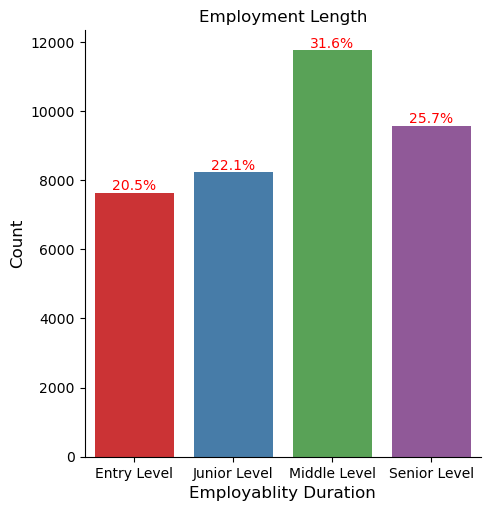

In [162]:
#Plotting employment lenght
emp_category = ['Entry Level','Junior Level','Middle Level','Senior Level']
plot = sns.catplot(data = df0,x = "emp_length_categorised",order=emp_category,kind = "count",palette="Set1")
plt.title("Employment Length",fontsize = 12)
plt.xlabel("Employablity Duration",fontsize=12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')


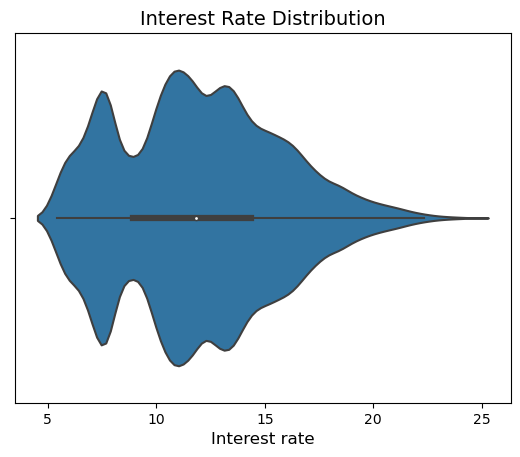

In [163]:
#Distribution of interest rate
sns.violinplot(df0['int_rate'])
plt.title("Interest Rate Distribution",fontsize=14)
plt.xlabel("Interest rate",fontsize=12)
plt.show()

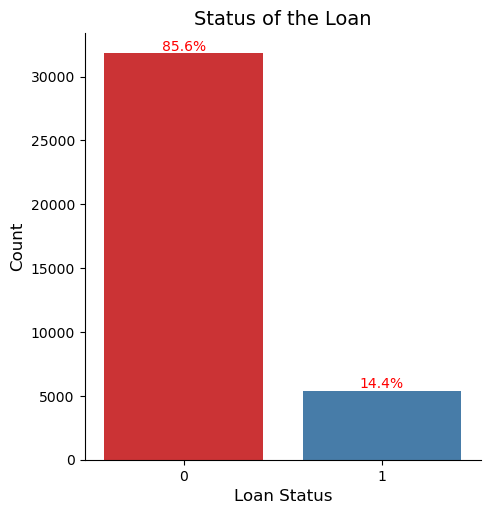

In [164]:
# Distribution of loan
plot = sns.catplot(x = "loan_status",kind= "count",data = df0,palette="Set1")
plt.title("Status of the Loan", fontsize = 14)
plt.xlabel("Loan Status",fontsize=12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')


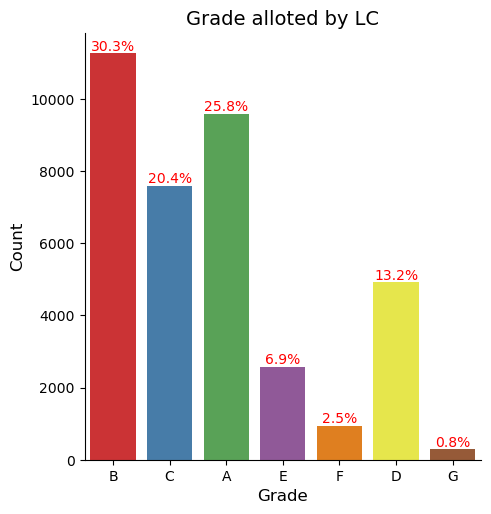

In [165]:
#Plotting the grades
plot = sns.catplot(x = "grade",kind= "count",data = df0,palette="Set1")
plt.title("Grade alloted by LC", fontsize = 14)
plt.xlabel("Grade",fontsize=12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')


# **Bivariate Analysis**

Bivariate analysis is one of the statistical analysis where two or  variables are observed. One variable here is dependent while the other is independent. These variables are usually denoted by X and Y. So, here we analyse the changes occured between the two or  variables and to what extent.

In [166]:
# Check individual values in the variable
df0['initial_list_status'].unique()

array(['f'], dtype=object)

In [167]:
# Check individual values in the variable
df0['policy_code'].unique()

array([1])

In [168]:
# Check individual values in the variable
df0['acc_now_delinq'].unique()

array([0])

In [169]:
# Check individual values in the variable
df0['pymnt_plan'].unique()

array(['n'], dtype=object)

In [170]:
# Check individual values in the variable
df0['delinq_amnt'].unique()

array([0])

In [171]:
# Let's further drop few coulmns since the values in those colums has single  repeated value which is not useful for data visualisation
df0 = df0.drop(['initial_list_status','policy_code','acc_now_delinq','pymnt_plan'],axis =1)

In [172]:
# Dropping unnecessary column
df0 = df0.drop('delinq_amnt',axis = 1)

In [173]:
df0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,annual_inc,verification_status,issue_d,loan_status,purpose,dti,month_issue,year_issue,income_range,emp_length_categorised
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,24000.0,Verified,2011-12-01,0,credit_card,27.65,12,2011,Low,Senior Level
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,30000.0,Source Verified,2011-12-01,1,car,1.00,12,2011,Low,Entry Level
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,12252.0,Not Verified,2011-12-01,0,small_business,8.72,12,2011,Low,Senior Level
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,49200.0,Source Verified,2011-12-01,0,other,20.00,12,2011,Medium,Senior Level
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,36000.0,Source Verified,2011-12-01,0,wedding,11.20,12,2011,Low,Junior Level


In [174]:
# Check individual values in the variable
df0.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [175]:
# Check individual values in the variable
df0.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

Text(0, 0.5, 'Loan Amount')

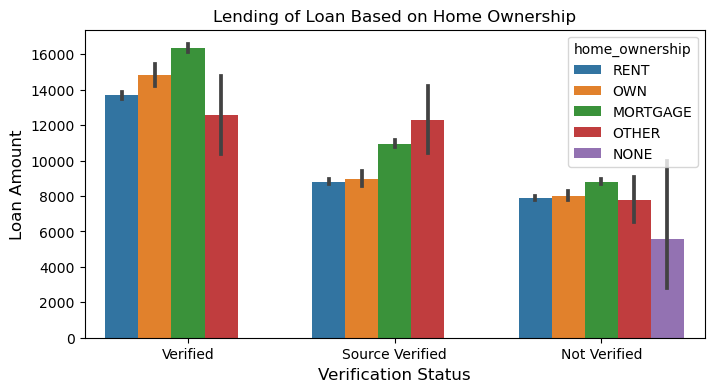

In [176]:
# Loan disbursement based on home ownership with verification status
plt.figure(figsize=(8,4))
sns.barplot(data = df0,x="verification_status",y="funded_amnt",hue="home_ownership")
plt.title("Lending of Loan Based on Home Ownership",fontsize = 12)
plt.xlabel("Verification Status",fontsize = 12)
plt.ylabel("Loan Amount",fontsize = 12)



Loans are funded the highest for mortgage with a verified status.

In [177]:
# Check individual values in the variable
df0.income_range.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [178]:
# Importing plotly library
import plotly.express as px

In [179]:
# Distribution of interest rate over a period of year
fig = px.box(df0,x="year_issue",y="int_rate",color = "income_range")
fig.show()

In [180]:
# Statistical information for dti
df0.dti.describe()

count    37165.000000
mean        13.345392
std          6.645147
min          0.000000
25%          8.240000
50%         13.450000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

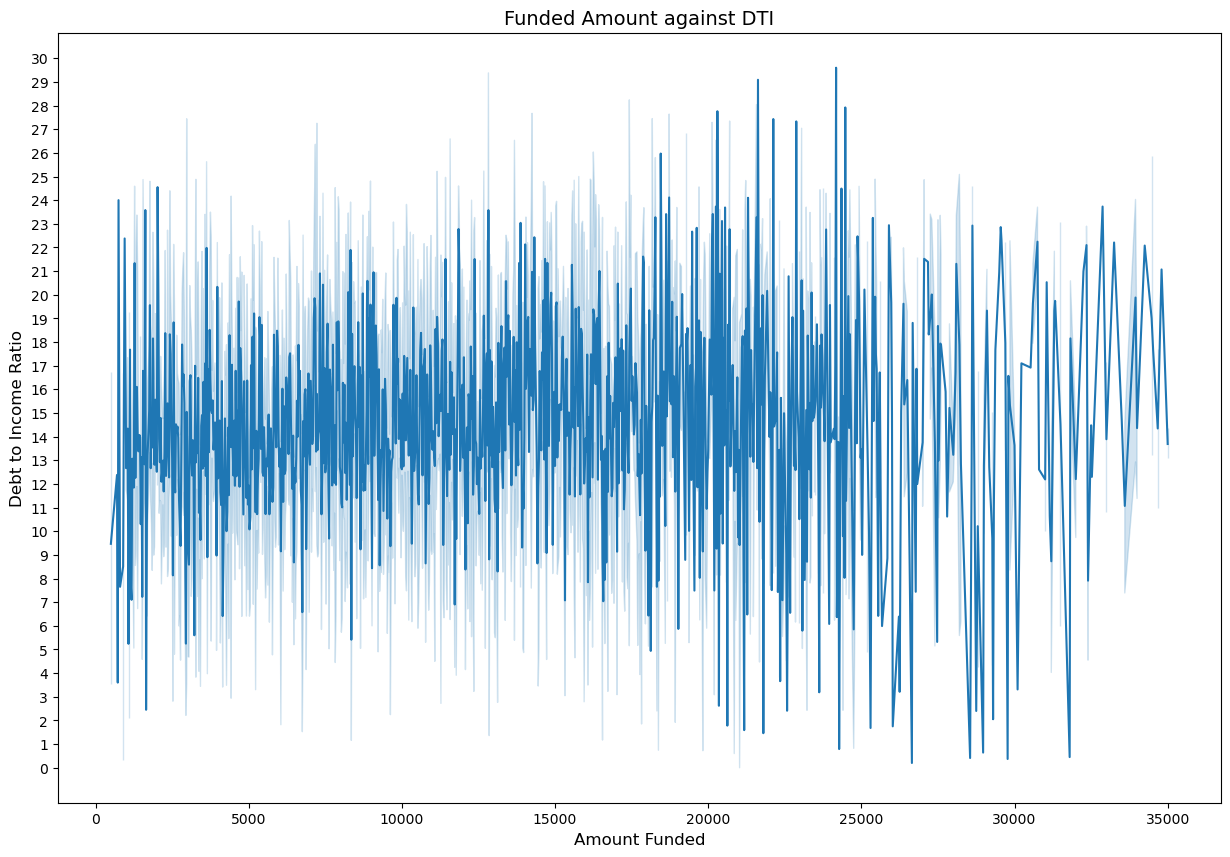

In [181]:
# The behaviour dti corresponding to annual income
plt.figure(figsize=(15,10))
sns.lineplot(data = df0,x = "funded_amnt",y = "dti",markers = True)
plt.title("Funded Amount against DTI",fontsize=14)
plt.xlabel("Amount Funded",fontsize=12)
plt.ylabel("Debt to Income Ratio",fontsize = 12)
plt.yticks(np.arange(0,31))
plt.show()

Text(0, 0.5, 'Installment')

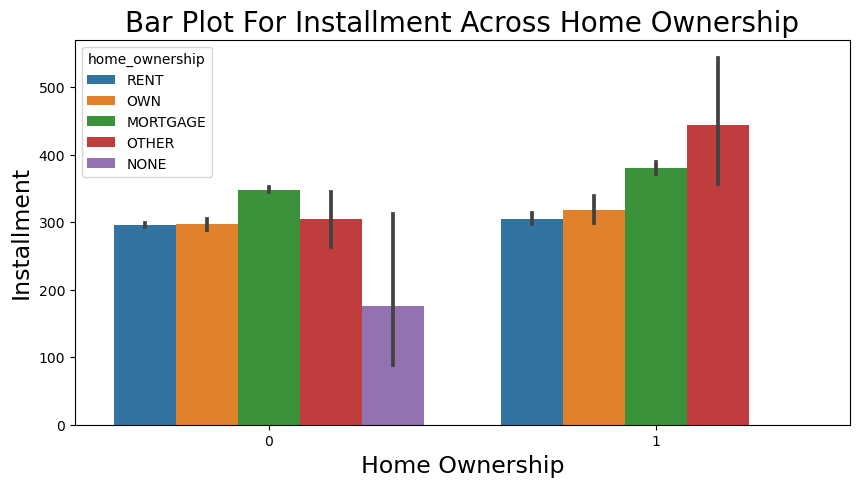

In [182]:
# Loan Status Vs Home Ownership
plt.figure(figsize=(10,5))
sns.barplot(x='loan_status', y='installment',hue='home_ownership', data=df0)
plt.title("Bar Plot For Installment Across Home Ownership", fontsize=20)
plt.xlabel("Home Ownership", fontsize=17)
plt.ylabel("Installment", fontsize=17)


In [183]:
# Lets categorise interest rates for further analysis
def interest_rates(n):
    if n < 9:
        return 'Low'
    elif n >=9 and n < 12:
        return 'Medium'
    elif n >= 12 and n < 14:
        return 'High'
    else:
        return 'Very High'
    
df0['categorised_int_rate'] = df0['int_rate'].apply(interest_rates)
df0.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,verification_status,issue_d,loan_status,purpose,dti,month_issue,year_issue,income_range,emp_length_categorised,categorised_int_rate
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,Verified,2011-12-01,0,credit_card,27.65,12,2011,Low,Senior Level,Medium
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,Source Verified,2011-12-01,1,car,1.00,12,2011,Low,Entry Level,Very High
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,Not Verified,2011-12-01,0,small_business,8.72,12,2011,Low,Senior Level,Very High
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,Source Verified,2011-12-01,0,other,20.00,12,2011,Medium,Senior Level,High
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,Source Verified,2011-12-01,0,wedding,11.20,12,2011,Low,Junior Level,Low


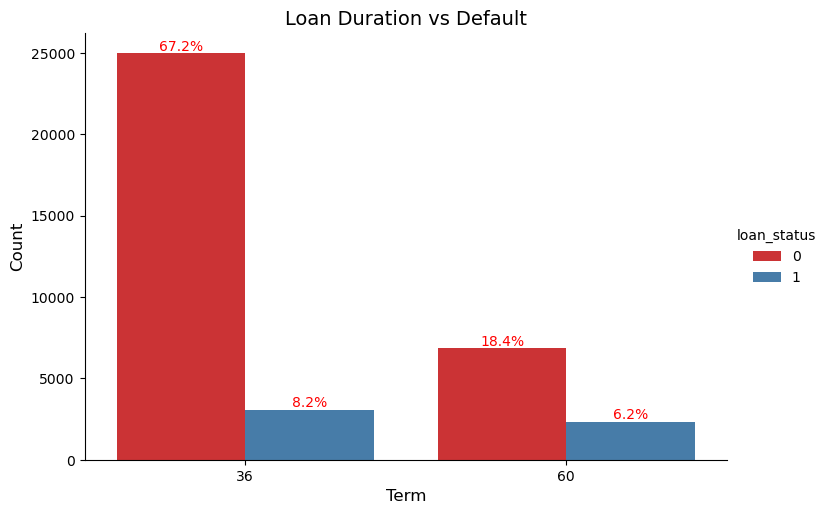

In [205]:
# Loan Duration Vs Default
plot = sns.catplot(x="term", hue='loan_status', kind="count", data=df0, palette="Set1", aspect= 1.5)
plt.title("Loan Duration vs Default",fontsize = 14)
plt.xlabel("Term",fontsize = 12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')


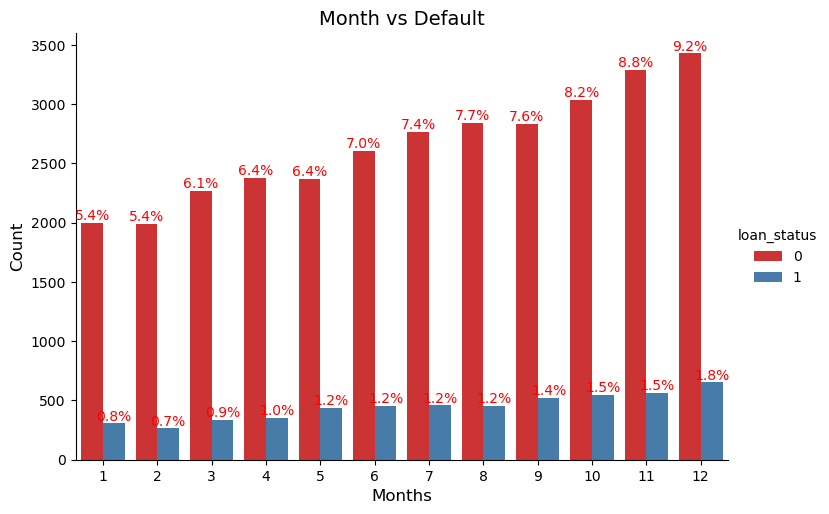

In [206]:
# Month Vs Default
plot = sns.catplot(x="month_issue", hue='loan_status', kind="count", data=df0, palette="Set1", aspect= 1.5)
plt.title("Month vs Default",fontsize = 14)
plt.xlabel("Months",fontsize = 12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')


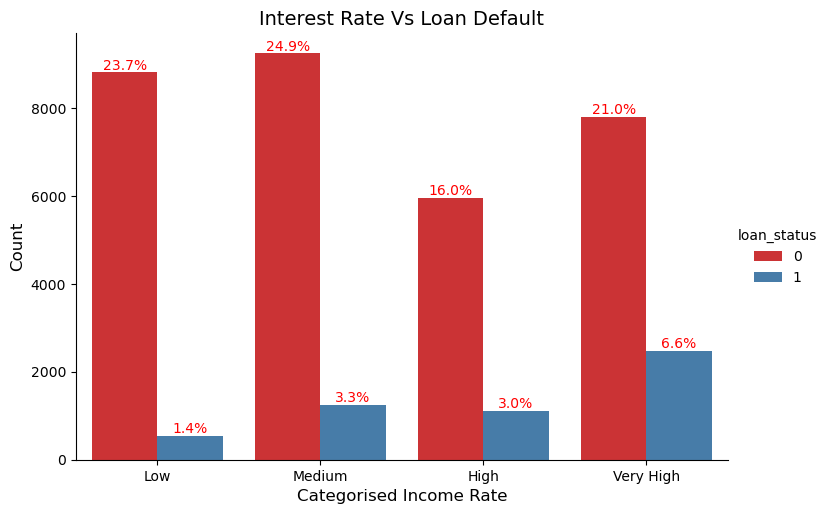

In [184]:
#Interest rate VS Default
order_category = ['Low','Medium','High','Very High']
plot = sns.catplot(x="categorised_int_rate", hue='loan_status', kind="count", data=df0, palette="Set1", aspect= 1.5, order=order_category)
plt.title("Interest Rate Vs Loan Default",fontsize = 14)
plt.xlabel("Categorised Income Rate",fontsize = 12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')


In [185]:
# Statistical information on loan amount
df0.loan_amnt.describe()

count    37165.000000
mean     11032.377909
std       7270.302311
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [186]:
#Categorising Loan Amount
def loan_amount(n):
    if n < 5400:
        return 'Low'
    elif n >=5400 and n < 9800:
        return 'Medium'
    elif n >= 9800 and n < 15000:
        return 'High'
    else:
        return 'Very High'
    
df0['categorised_loan_amnt'] = df0['loan_amnt'].apply(loan_amount)
df0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,issue_d,loan_status,purpose,dti,month_issue,year_issue,income_range,emp_length_categorised,categorised_int_rate,categorised_loan_amnt
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,2011-12-01,0,credit_card,27.65,12,2011,Low,Senior Level,Medium,Low
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,2011-12-01,1,car,1.00,12,2011,Low,Entry Level,Very High,Low
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,2011-12-01,0,small_business,8.72,12,2011,Low,Senior Level,Very High,Low
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,2011-12-01,0,other,20.00,12,2011,Medium,Senior Level,High,High
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,2011-12-01,0,wedding,11.20,12,2011,Low,Junior Level,Low,Low


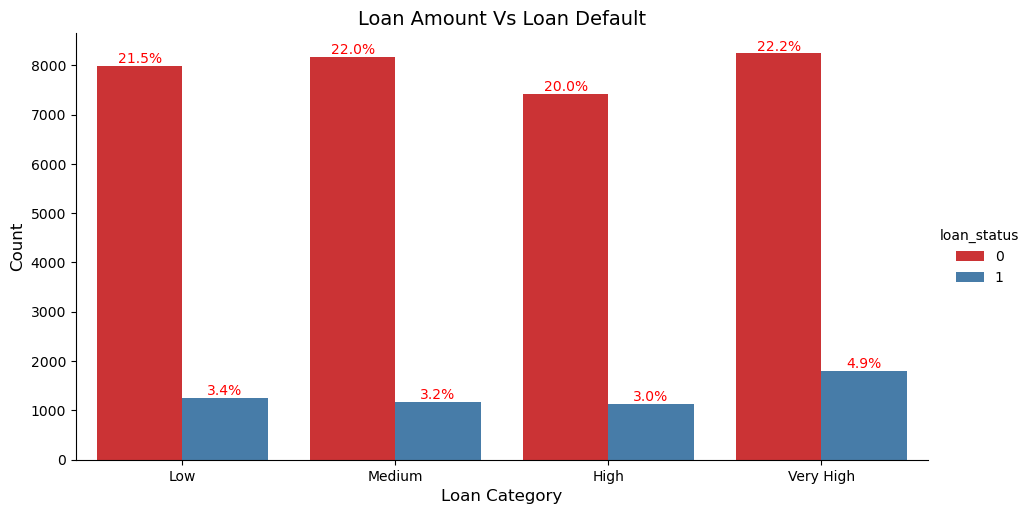

In [187]:
#Loan Amount Vs Default
order_category = ['Low','Medium','High','Very High']
plot = sns.catplot(data = df0,x="categorised_loan_amnt", hue='loan_status', kind="count", palette="Set1", aspect= 1.9, order=order_category)
plt.title("Loan Amount Vs Loan Default",fontsize = 14)
plt.xlabel("Loan Category",fontsize = 12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')


In [189]:
# Lets Categorise Debto - to - Income Ratio
def dti_modify(n):
    if n < 8.24:
        return 'Low'
    elif n >= 8.24 and n <13.45:
        return 'Medium'
    elif n>=13.45 and n < 18.60:
        return 'High'
    else:
        return 'Very High'
    
df0['categorised_dti'] = df0['dti'].apply(dti_modify)
df0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status,purpose,dti,month_issue,year_issue,income_range,emp_length_categorised,categorised_int_rate,categorised_loan_amnt,categorised_dti
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0,credit_card,27.65,12,2011,Low,Senior Level,Medium,Low,Very High
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1,car,1.00,12,2011,Low,Entry Level,Very High,Low,Low
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0,small_business,8.72,12,2011,Low,Senior Level,Very High,Low,Medium
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0,other,20.00,12,2011,Medium,Senior Level,High,High,Very High
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,0,wedding,11.20,12,2011,Low,Junior Level,Low,Low,Medium


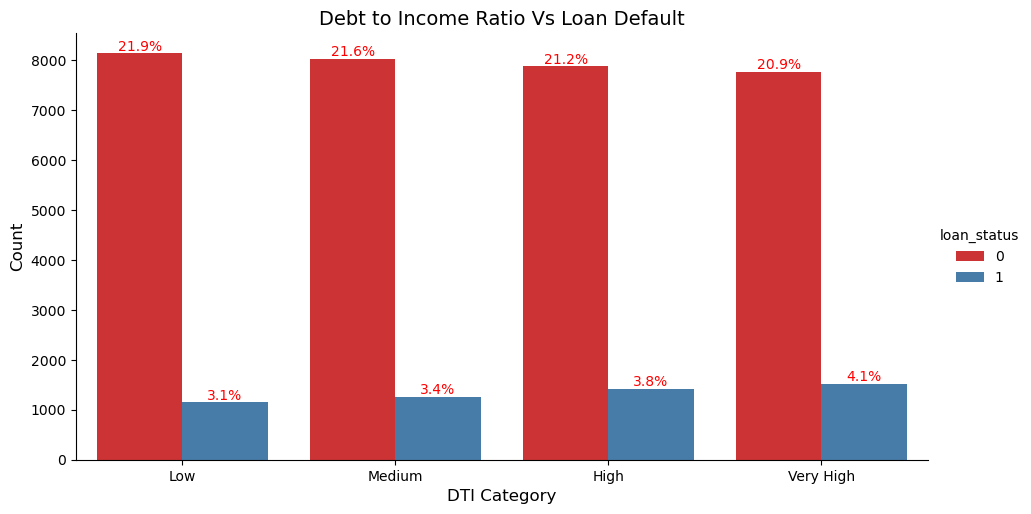

In [190]:
# DTI Vs Loan Default
order_category = ['Low','Medium','High','Very High']
plot = sns.catplot(data = df0,x="categorised_dti", hue='loan_status', kind="count", palette="Set1", aspect= 1.9, order=order_category)
plt.title("Debt to Income Ratio Vs Loan Default",fontsize = 14)
plt.xlabel("DTI Category",fontsize = 12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')


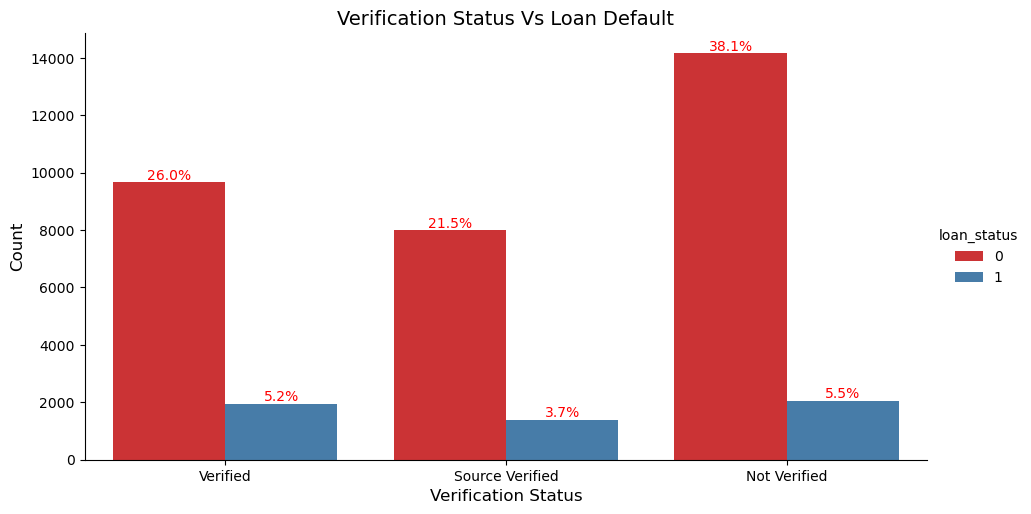

In [191]:
# Verification Vs Loan Status
plot = sns.catplot(data = df0,x="verification_status", hue='loan_status', kind="count", palette="Set1", aspect= 1.9)
plt.title("Verification Status Vs Loan Default",fontsize = 14)
plt.xlabel("Verification Status",fontsize = 12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')


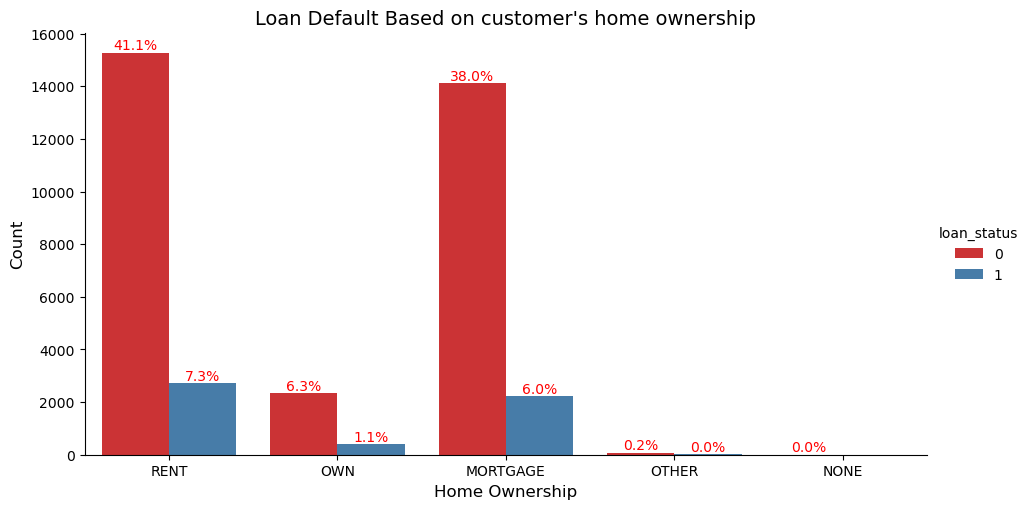

In [192]:
# Home Ownership Vs Loan Status
plot = sns.catplot(data = df0,x="home_ownership", hue='loan_status', kind="count", palette="Set1", aspect= 1.9)
plt.title("Loan Default Based on customer's home ownership",fontsize = 14)
plt.xlabel("Home Ownership",fontsize = 12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')


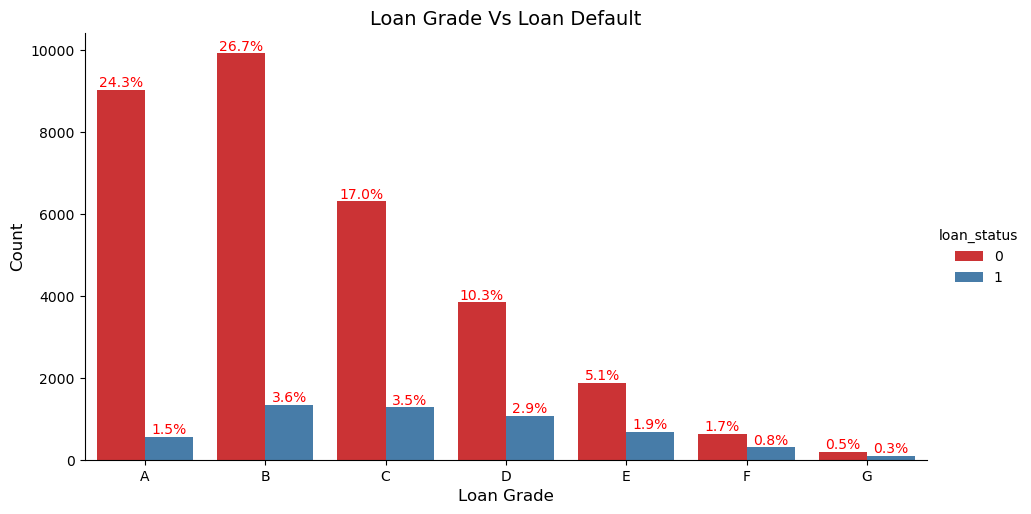

In [193]:
# Loan Grade Vs Default
order_grade = ['A','B','C','D','E','F','G']
plot = sns.catplot(data = df0,x="grade", hue='loan_status', kind="count", palette="Set1", aspect= 1.9, order=order_grade)
plt.title("Loan Grade Vs Loan Default",fontsize = 14)
plt.xlabel("Loan Grade",fontsize = 12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')



In [194]:
# Values present in purpose column
df0.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [195]:
#Categorising Purpose of loan
filtered_purpose_df =   df0[(df0['purpose']=='debt_consolidation')
                           |(df0['purpose']=='credit_card')
                           |(df0['purpose']=='home_improvement')
                           |(df0['purpose']=='major_purchase')
                           |(df0['purpose']=='small_business')
                           |(df0['purpose']=='others')]




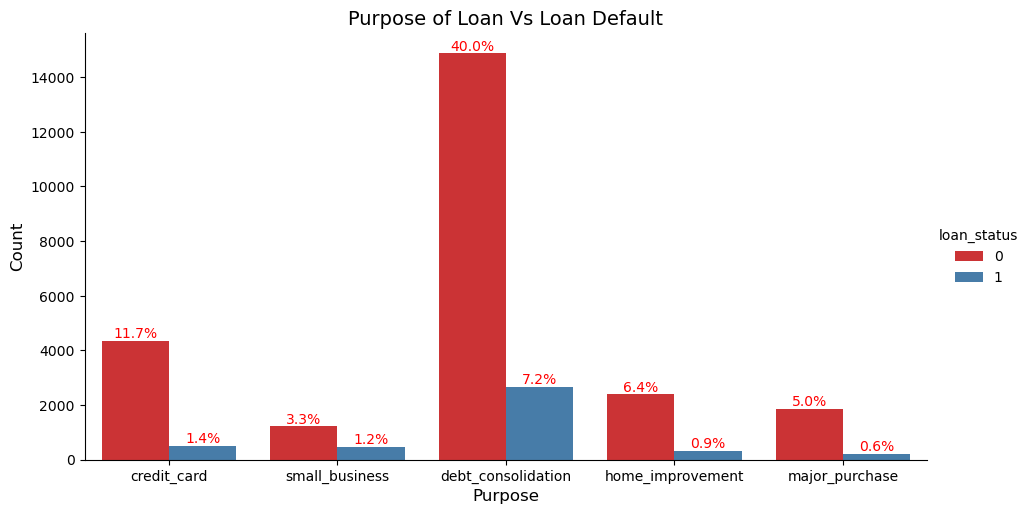

In [196]:
#Purpose of loan Vs Default
plot = sns.catplot(data = filtered_purpose_df,x="purpose", hue='loan_status', kind="count", palette="Set1", aspect= 1.9)
plt.title("Purpose of Loan Vs Loan Default",fontsize = 14)
plt.xlabel("Purpose",fontsize = 12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')


In [198]:
# Categorising annual income
def annual_inc_modify(n):
    if n < 40906:
        return 'Low'
    elif n >= 40906 and n <59000:
        return 'Medium'
    elif n>=59000 and n < 81600:
        return 'High'
    else:
        return 'Very High'
    
df0['annual_inc_categorised'] = df0['annual_inc'].apply(annual_inc_modify)
df0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,dti,month_issue,year_issue,income_range,emp_length_categorised,categorised_int_rate,categorised_loan_amnt,categorised_dti,annual_inc_categorised
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,credit_card,27.65,12,2011,Low,Senior Level,Medium,Low,Very High,Low
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,car,1.00,12,2011,Low,Entry Level,Very High,Low,Low,Low
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,small_business,8.72,12,2011,Low,Senior Level,Very High,Low,Medium,Low
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,other,20.00,12,2011,Medium,Senior Level,High,High,Very High,Medium
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,wedding,11.20,12,2011,Low,Junior Level,Low,Low,Medium,Low


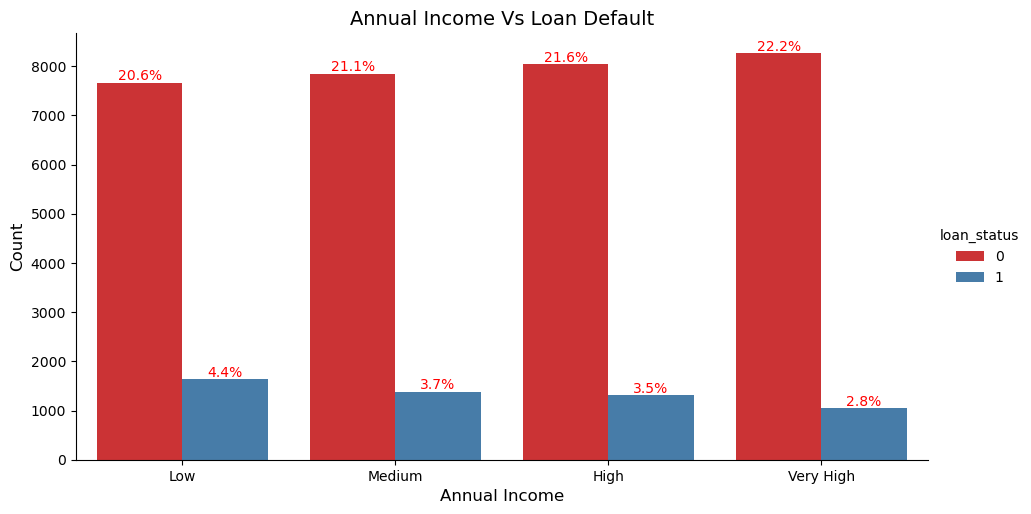

In [199]:
#Annual income Vs Default
plot = sns.catplot(data = df0,x="annual_inc_categorised", hue='loan_status', kind="count", palette="Set1", aspect= 1.9, order=order_category)
plt.title("Annual Income Vs Loan Default",fontsize = 14)
plt.xlabel("Annual Income",fontsize = 12)
plt.ylabel("Count",fontsize = 12)

#labelling %value on bar
ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df0))),(p.get_x()+p.get_width()/2.,p.get_height()),
        color = 'red',ha ='center',va = 'bottom')
